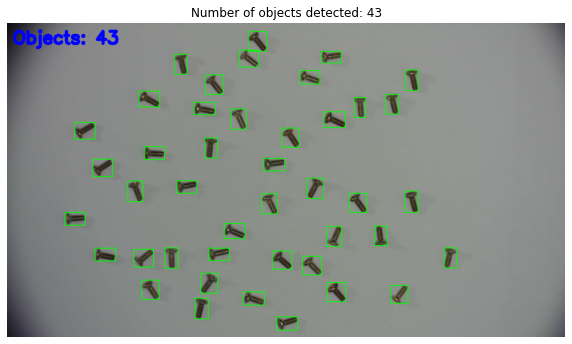

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image_path = 'img6.jpg'
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    print("Error: Could not open or find the image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)

    # Apply binary thresholding
    _, thresh = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform morphological operations to remove small noise
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Detect edges using Canny edge detector
    edges = cv2.Canny(morph, threshold1=30, threshold2=150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours by area
    min_area = 100  # Adjust this threshold based on the size of objects
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > min_area]

    # Draw bounding boxes around detected objects
    for contour in filtered_contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Count the number of detected contours
    number_of_objects = len(filtered_contours)

    # Annotate the image with the number of detected objects
    cv2.putText(image, f'Objects: {number_of_objects}', (20, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 10)

    # Display the original image with bounding boxes
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Number of objects detected: {number_of_objects}')
    plt.axis('off')
    plt.show()

    
